In [47]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Часто используемые функции
def hist_show(a, b = 50):
    plt.hist(a, bins = b)
    plt.show()
    
    
def replace_zero_to_mean(a):
    mean_data = int(a.mean())
    return a.replace(0, mean_data)
    
    
def mm_scaler(a):
    a = np.array(a).reshape(-1, 1)
    a =MinMaxScaler().fit_transform(a).flatten()
    return a


def standard_scaler(a):
    a = np.array(a).reshape(-1, 1)
    a =StandardScaler().fit_transform(a).flatten()
    return a

In [49]:
# Загрузка и анализ набора данных
country_dataset = pd.read_csv('Набор_3_страны_мира.csv',  sep=';')
country_dataset.head(10)

,country,region,population,area,coastline,infant_mortality,gdp,literacy,phones,arable,birthrate,deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,0,"163,07",700.0,36,"3,2","12,13","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"1,26","21,52",4500.0,"86,5","71,2","21,09","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"0,04",31,6000.0,70,"78,1","3,22","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"58,29","9,27",8000.0,97,"259,5",10,"22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,0,"4,05",19000.0,100,"497,2","2,22","8,71","6,25"
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"0,13","191,19",1900.0,42,"7,8","2,41","45,11","24,2"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"59,8","21,03",8600.0,95,460,0,"14,17","5,34"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"34,54","19,46",11000.0,89,"549,9","18,18","16,93","5,37"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"0,18","15,18",11200.0,"97,1","220,4","12,31","16,73","7,55"
9,Armenia,C.W. OF IND. STATES,2976372,29800,0,"23,28",3500.0,"98,6","195,7","17,55","12,07","8,23"


In [50]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pd.DataFrame()

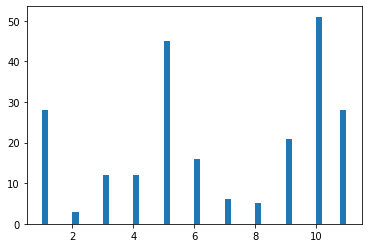

In [51]:
# столбец "region"
data = country_dataset['region']
data = pd.get_dummies(data)
data = np.array([data[i[1]] * (i[0]+1) for i in  enumerate(data)]).flatten()
data = data[data != 0]
hist_show(data)

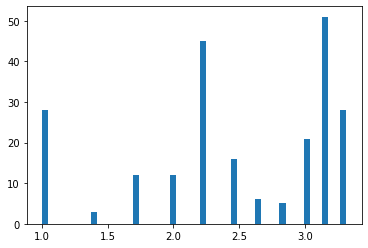

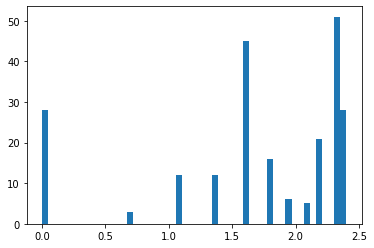

In [52]:
hist_show(data**0.5)
hist_show(np.log(data))

In [53]:
dataset['region'] = mm_scaler(data**0.5) 
dataset.head(10)

,region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


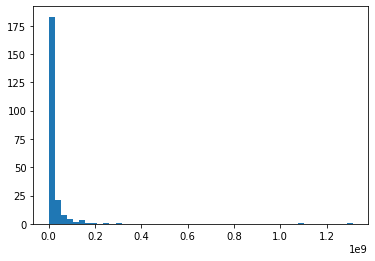

In [54]:
# столбец "population"
data = country_dataset['population']
hist_show(data)

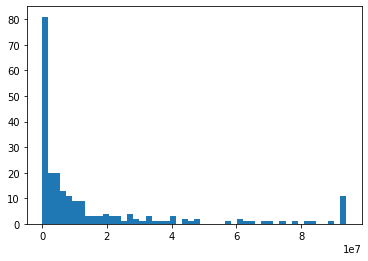

In [55]:
data = np.clip(data, 0, 94000000)
hist_show(data)

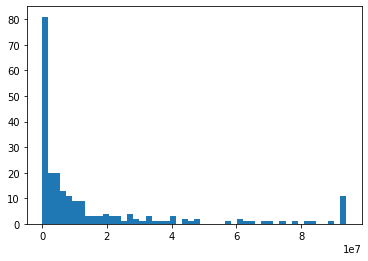

In [56]:
data = replace_zero_to_mean(data)
hist_show(data)

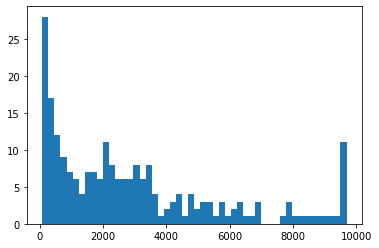

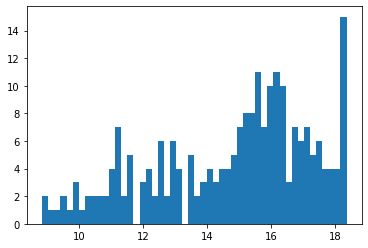

In [57]:
hist_show(data**0.5)
hist_show(np.log(data))

In [58]:
dataset['population'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population
0,0.0,0.883442
1,0.0,0.656108
2,0.0,0.889605
3,0.0,0.221784
4,0.0,0.243741
5,0.0,0.784469
6,0.0,0.068555
7,0.0,0.240601
8,0.0,0.909869
9,0.0,0.636624


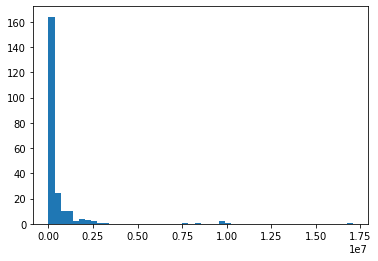

In [59]:
# столбец "area"
data = country_dataset['area']
hist_show(data)

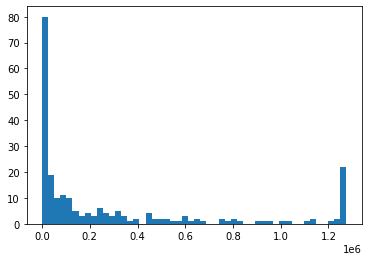

In [60]:
data = np.clip(data, 0, 1275200)
hist_show(data)

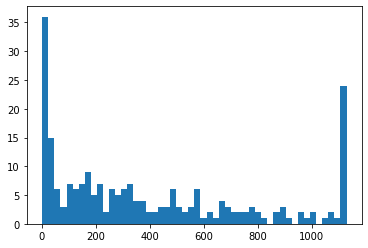

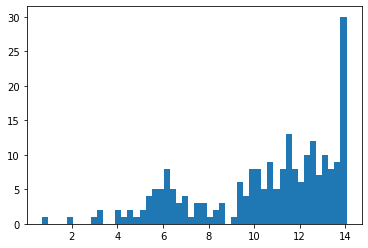

In [61]:
hist_show(data**0.5)
hist_show(np.log(data))

In [62]:
dataset['area'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population,area
0,0.0,0.883442,0.949292
1,0.0,0.656108,0.716262
2,0.0,0.889605,1.000000
3,0.0,0.221784,0.344182
4,0.0,0.243741,0.408165
5,0.0,0.784469,0.998309
6,0.0,0.068555,0.294178
7,0.0,0.240601,0.404058
8,0.0,0.909869,1.000000
9,0.0,0.636624,0.718951


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


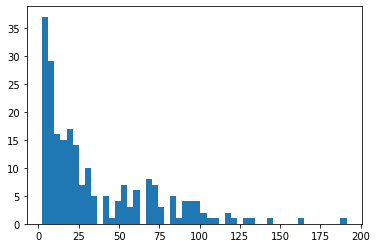

In [63]:
# столбец "infant_mortality"
country_dataset['infant_mortality'] = country_dataset['infant_mortality'].astype(str)
country_dataset['infant_mortality'] = [x.replace(',', '.') for x in country_dataset['infant_mortality']]
country_dataset['infant_mortality'] = country_dataset['infant_mortality'].astype(float)
data = country_dataset['infant_mortality']
plt.hist(data, bins = 50)
plt.show()

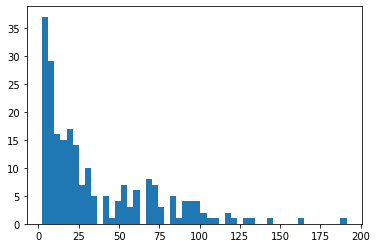

In [64]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

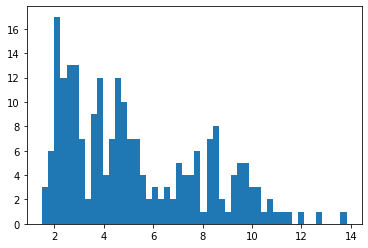

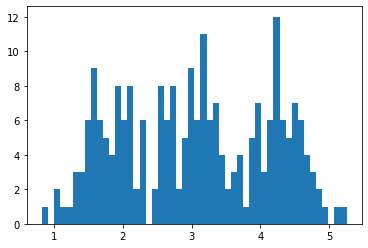

In [65]:
hist_show(data**0.5)
hist_show(np.log(data))

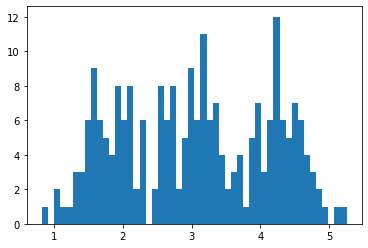

In [66]:
plt.hist(np.log(data), bins = 50)
plt.show()

In [67]:
dataset['infant_mortality'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population,area,infant_mortality
0,0.0,0.883442,0.949292,0.964046
1,0.0,0.656108,0.716262,0.506345
2,0.0,0.889605,1.000000,0.588837
3,0.0,0.221784,0.344182,0.316005
4,0.0,0.243741,0.408165,0.128859
5,0.0,0.784469,0.998309,1.000000
6,0.0,0.068555,0.294178,0.501139
7,0.0,0.240601,0.404058,0.483604
8,0.0,0.909869,1.000000,0.427469
9,0.0,0.636624,0.718951,0.524111


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


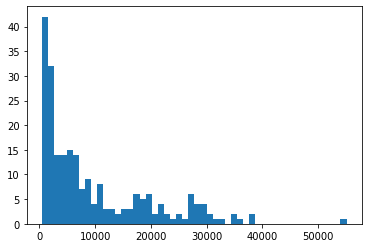

In [68]:
# столбец "gdp"
data = country_dataset['gdp']
hist_show(data)

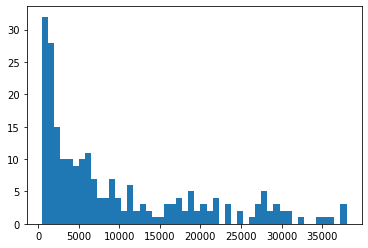

In [69]:
data = np.clip(data, 0, 38000)
hist_show(data)

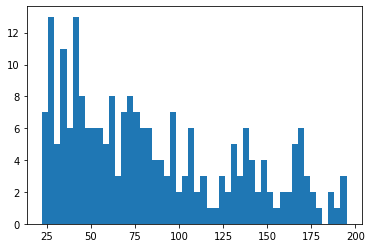

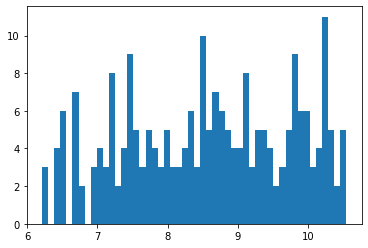

In [70]:
hist_show(data**0.5)
hist_show(np.log(data))

In [71]:
dataset['gdp'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,infant_mortality,gdp
0,0.0,0.883442,0.949292,0.964046,0.023739
1,0.0,0.656108,0.716262,0.506345,0.259141
2,0.0,0.889605,1.000000,0.588837,0.319275
3,0.0,0.221784,0.344182,0.316005,0.388712
4,0.0,0.243741,0.408165,0.128859,0.669156
5,0.0,0.784469,0.998309,1.000000,0.123009
6,0.0,0.068555,0.294178,0.501139,0.407796
7,0.0,0.240601,0.404058,0.483604,0.478170
8,0.0,0.909869,1.000000,0.427469,0.483670
9,0.0,0.636624,0.718951,0.524111,0.213241


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


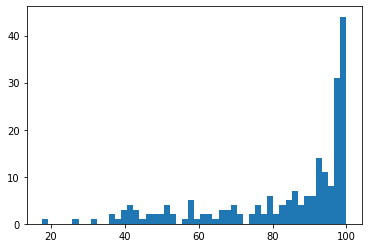

In [72]:
# столбец "literacy"
country_dataset['literacy'] = country_dataset['literacy'].astype(str)
country_dataset['literacy'] = [x.replace(',', '.') for x in country_dataset['literacy']]
country_dataset['literacy'] = country_dataset['literacy'].astype(float)
data = country_dataset['literacy']
hist_show(data)

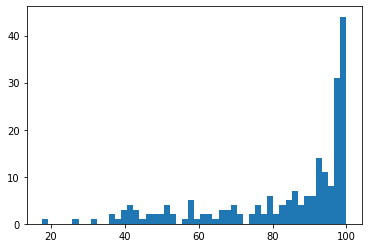

In [73]:
data = replace_zero_to_mean(data)
hist_show(data)

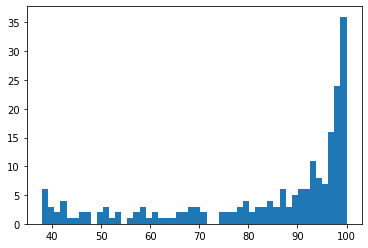

In [74]:
data = np.clip(data, 38, 100)
hist_show(data)

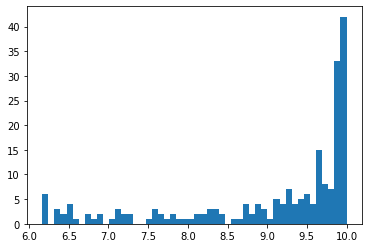

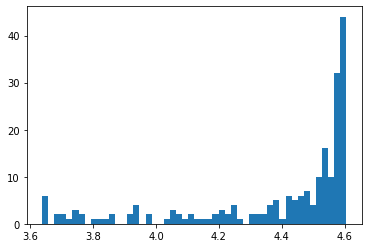

In [75]:
hist_show(data**0.5)
hist_show(np.log(data))

In [76]:
dataset['literacy'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,infant_mortality,gdp,literacy
0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000
1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639
2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146
3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595
4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000
5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472
6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985
7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430
8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918
9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


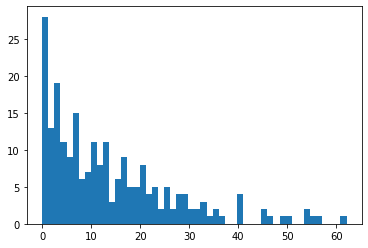

In [77]:
# столбец "arable"
country_dataset['arable'] = country_dataset['arable'].astype(str)
country_dataset['arable'] = [x.replace(',', '.') for x in country_dataset['arable']]
country_dataset['arable'] = country_dataset['arable'].astype(float)
data = country_dataset['arable']
hist_show(data)

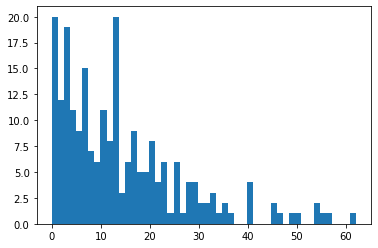

In [78]:
data = replace_zero_to_mean(data)
hist_show(data)

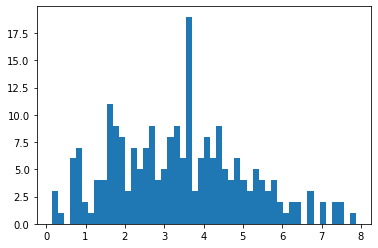

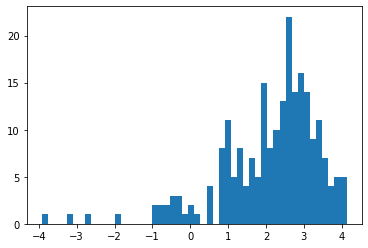

In [79]:
hist_show(data**0.5)
hist_show(np.log(data))

In [80]:
dataset['arable'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,infant_mortality,gdp,literacy,arable
0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729
1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092
2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580
3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313
4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240
5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309
6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587
7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637
8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055
9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


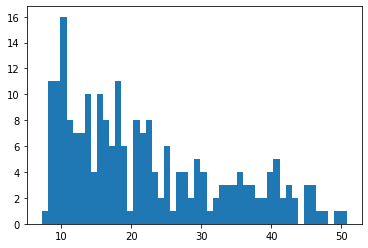

In [81]:
# столбец "birthrate"
country_dataset['birthrate'] = country_dataset['birthrate'].astype(str)
country_dataset['birthrate'] = [x.replace(',', '.') for x in country_dataset['birthrate']]
country_dataset['birthrate'] = country_dataset['birthrate'].astype(float)
data = country_dataset['birthrate']
hist_show(data)

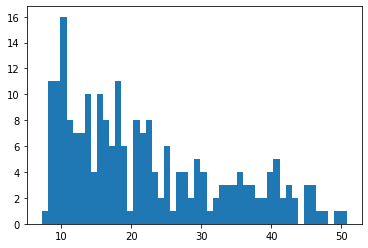

In [82]:
data = replace_zero_to_mean(data)
hist_show(data)

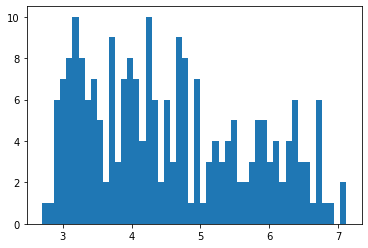

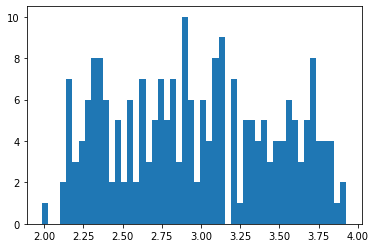

In [83]:
hist_show(data**0.5)
hist_show(np.log(data))

In [84]:
dataset['birthrate'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,infant_mortality,gdp,literacy,arable,birthrate
0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051
1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436
2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619
3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096
4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816
5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174
6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657
7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866
8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354
9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


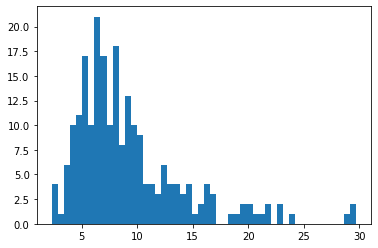

In [85]:
# столбец "deathrate"
country_dataset['deathrate'] = country_dataset['deathrate'].astype(str)
country_dataset['deathrate'] = [x.replace(',', '.') for x in country_dataset['deathrate']]
country_dataset['deathrate'] = country_dataset['deathrate'].astype(float)
data = country_dataset['deathrate']
hist_show(data)

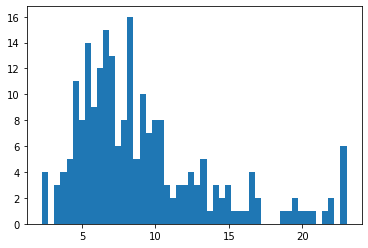

In [86]:
data = np.clip(data, 0, 23)
hist_show(data)

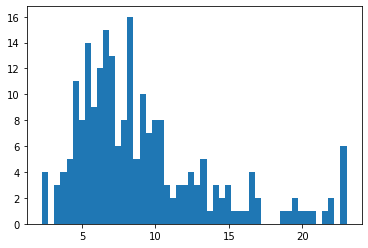

In [87]:
data = replace_zero_to_mean(data)
hist_show(data)

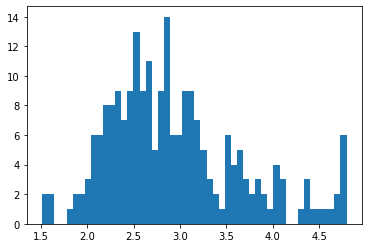

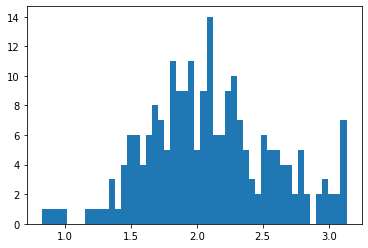

In [88]:
hist_show(data**0.5)
hist_show(np.log(data))

In [89]:
dataset['deathrate'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [90]:
dataset.to_csv('prepared_data.csv')